
**go to the Fast.ai documentation for understanding code!**

This notebook highlights on how to quickly build a **Learner** and fine tune a pretrained model on most computer vision tasks.

#Single-label classification

A dataset called the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) that contains 7,349 images of cats and dogs from 37 different breeds will be downloaded from the fast.ai datasets collection

-Uqq is used to install update version

In [ ]:
!pip install -Uqq fastai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.8 MB/s eta 0:00:00


import all functions, classes and modules
for example:

from fastai.vision.all import load_learner, PILImage, ImageDataLoaders


In [1]:
from fastai.vision.all import *

download dataset and decompressed

In [2]:
path = untar_data(URLs.PETS)/'images'

In [3]:
path.ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_74.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_28.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_93.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_212.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_93.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_121.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_146.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_135.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_66.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_132.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_69.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_169.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_159.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_112.jpg

In [4]:
path.ls()[30:60]

(#30) [Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_38.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_117.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_198.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_71.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_170.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_118.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_49.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_135.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_101.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_48.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_47.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_10.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_183.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_134.jpg'),Path('/root/.

the images that starts with lowercase are dogs

In [5]:
items = path.ls()
filtered_items = [item for item in items if item.name[0].islower()]
print(filtered_items)


[Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_28.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_212.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_93.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_121.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_135.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_66.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_69.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_169.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_159.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/pug_112.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_113.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_110.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_193.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/york

the images that starts with uppercase are cats

In [6]:
items = path.ls()
filtered_items = [item for item in items if item.name[0].isupper()]
print(filtered_items)

[Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_74.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_93.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_146.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_132.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_80.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_6.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_117.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_49.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_48.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_183.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_134.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_126.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_113.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_168.jpg'), Path('/root/.fastai/data/oxford-

Take the image files ignoring annotations files

In [7]:
files = get_image_files(path)
len(files)

7390

In [8]:
files[0], files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_74.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_146.jpg'))

lable functions to label image (taking only cats)

In [9]:
def is_cat(x):
  return x[0].isupper()

* To get our data ready for a model, we need to put it in a DataLoaders object. Here we have a function that labels using the file names, so we will use **ImageDataLoaders.from_name_func.**

* There are other factory methods of ImageDataLoaders that could be more suitable for our problem. according to our problem check documentations for taking other methods of ImageDataLoaders

* item_tfms: this is a Transform applied on all items of our dataset that will resize each image to 224 by 224

* valid_pct = 0.2 means 20% of the data will be allocated for validation, and the remaining 80% will be used for training

* seed 42:  It only ensures that the same rows are assigned to the training and validation sets in every run. here 42 is a random number. we can take any other number instead of taking 42

* as we have passed the label function (is_cat) here that's why we have taken the from_name_func with ImageDataLoaders



In [10]:
dls = ImageDataLoaders.from_name_func( path, files, valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))

We can then check if everything looks okay with the show_batch method (True is for cat, False is for dog):

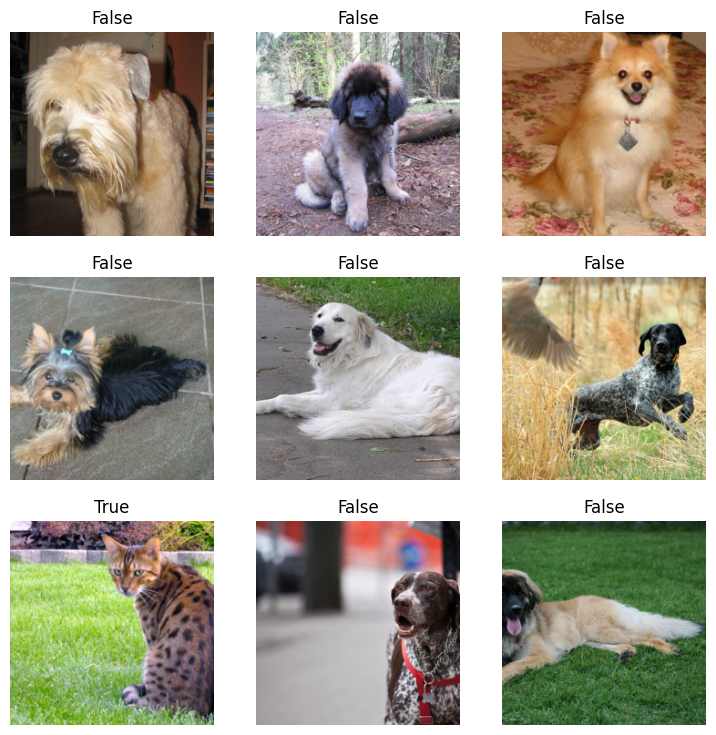

In [11]:
dls.show_batch()

* we can create a Learner, which is a fastai object that combines the data and a model for training, and uses transfer learning to fine tune a pretrained model in just two lines of code.

* The first line downloaded a model called ResNet34, pretrained on ImageNet, and adapted it to our specific problem. It then fine tuned that model and in a relatively short time, we get a model with an error rate of well under 1%… amazing!

* we can pass only those models that are with fastai. for other models we must customize with PyTorch before passing it to learner

* **Discriminative Fine-tuning:**  Different layers of the pre-trained model learn different types of features.  **Earlier layers** learn more general features (edges, textures), while **later layers** learn more specific features (parts of objects).  fine_tune applies different learning rates to different layers, typically **lower learning rates** to earlier layers and **higher learning rates** to later layers.  This helps preserve the pre-trained general features while adapting the later layers to your data.

* **Gradual Unfreezing:**  Initially, the pre-trained model's weights are frozen (not updated).  fine_tune starts by unfreezing only the last few layers and training them.  Then, it **gradually unfreezes** more layers and continues training.  This helps avoid disrupting the early layers that have learned good general features.

* Cycles:  The 2 in fine_tune(2) means that this process of **discriminative** fine-tuning and **gradual unfreezing** will be repeated twice.  Each cycle might involve adjusting learning rates and unfreezing more layers.  Multiple cycles can often lead to further improvements in performance.  It's like refining the model's adaptation to your specific data.

In [12]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)       #transfer learning

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 120MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.171152,0.020365,0.006089,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.065182,0.016677,0.004736,00:50
1,0.028868,0.008907,0.002030,00:48


If you want to make a prediction on a new image, you can use learn.predict. The predict method returns three things:

* the decoded prediction (True for Cat and False for dog)
* the index of the predicted class
*  the tensor of probabilities of all classes in the order of their indexed labels (index 0 for dog and index 1 for cat)

In [16]:
learn.predict(files[10])

('False', tensor(0), tensor([1.0000e+00, 2.5830e-09]))

We can also have a look at some predictions with the show_results method:

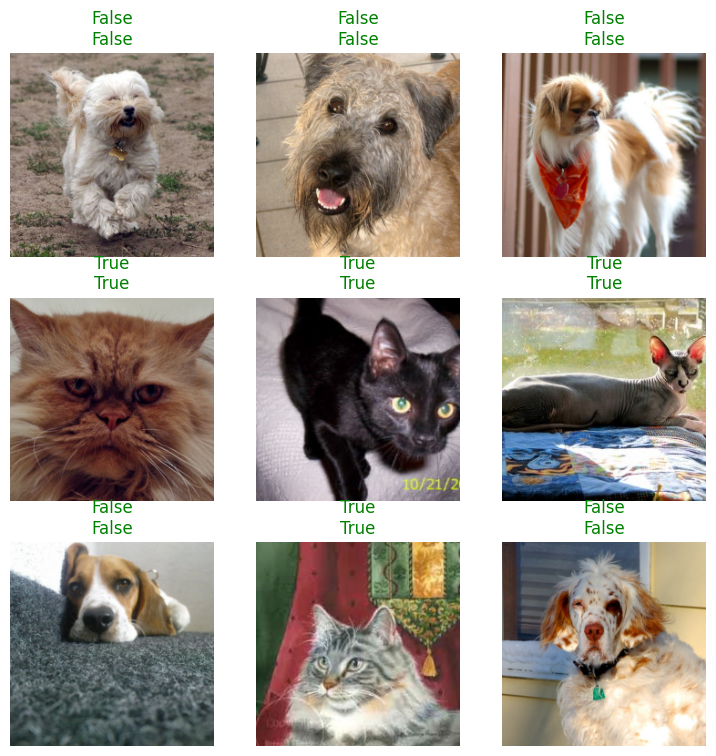

In [17]:
learn.show_results()

for test dataset purpose

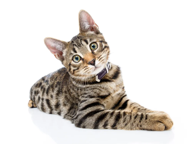

In [22]:
img = PILImage.create("/content/cat.webp")
img.to_thumb(192)

In [23]:
is_cat,_,probs = learn.predict(img)        #cz predict methods return three thing
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")       #2nd index from tensor of probabilities denotes

Is this a cat?: True.
Probability it's a cat: 1.000000


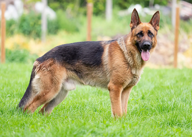

In [ ]:
img = PILImage.create("/content/dog.webp")
img.to_thumb(192)

In [ ]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000027


### Additional Resources
fastai documentation: https://docs.fast.ai/ <br/>
fastai datasets: https://docs.fast.ai/data.external.html <br/>
